# BackOrders MachineLearning: 

- **1 First Step**
    - 1.1 Load libraries and helper functions
    - 1.2 Load data
    - 1.3 Check the Memory Usage
    - 1.4 DataType Converting
    - 1.5 DateTime Parsing
- **2 Univariable Analysis**
    - 2.1 Categorical Analysis
    - 2.2 Target Value analysis
        - **A Review on Imbalanced Learning Methods**
     
    - 2.3 Missing Values Analysis
        - **Impute Missing Values**
    - 2.4 Imputation
- **3 Dimensionality Reduction**
     - 3.1 Removing Colliniarity among numerical Features
      -3.2 Categorical Feature Selection Univariate analysis
      -3.3 Categorical Feature selection using Feature Importance
      -3.4 PCA
- **4 Model selection using evaluation metrics**
    - 4.1 Hierarchy of sampling-based methods
    - 4.2 Cross-validation 





In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing important libraries of machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

<b>Loading Data

In [2]:
#loading traing and test set
train = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<b>Checking Memory Usage

In [3]:
#Memory Usage
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 296.2+ MB


- To Reduce Memory Usage, It's necessary to do DataType Converting

In [4]:
#Memory Usage
for c, dtype in zip(train.columns, train.dtypes):
    if dtype == np.float64:
        train[c] = train[c].astype(np.float32)
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float32(15), object(8)
memory usage: 199.6+ MB


In [5]:
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 42.5+ MB


##  Categorical Analysis and Feature Selection

In [6]:
train[train.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In [7]:
#define quantitative and categorical variable lists 

#Quant Vars
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

#Cat Vars
catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']

#CatPredictors
catpred=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop']

In [8]:
#Categorical Value of test data
test[test.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,No,Yes,No,No,Yes,No,No
1,3285131,No,No,No,Yes,No,No,No
2,3285358,No,No,No,No,Yes,No,No
3,3285517,No,No,No,Yes,Yes,No,No
4,3285608,No,No,No,No,Yes,No,No


Data Preprocessing

In [9]:
#Lat two rows of train data
train.tail(2)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#removing last row because it containg most of the value Nan
train.drop(train.index[-1], inplace=True)
test.drop(test.index[-1], inplace=True)

In [11]:
#Reducing Memory of train & test column 'sku'
train.sku = train.sku.astype(np.int32)
test.sku = test.sku.astype(np.int32)

In [12]:
#Merging train and test data
merged_data=pd.concat([train,test])

In [13]:
#whole data
merged_data.dtypes

sku                    int32
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

<h3> categorical variable feature selection

In [14]:
#collecting all the categorical feature in a single dataframe for analysis
catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']
catvars_variable=pd.DataFrame(merged_data,columns=catvars)

In [15]:
catvars_variable.head(5).transpose()

,0,1,2,3,4
potential_issue,No,No,No,No,No
deck_risk,No,No,Yes,No,Yes
oe_constraint,No,No,No,No,No
ppap_risk,No,No,No,No,No
stop_auto_buy,Yes,Yes,Yes,Yes,Yes
rev_stop,No,No,No,No,No
went_on_backorder,No,No,No,No,No


In [16]:
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
    contigency_table=catvars_variable[col].value_counts(ascending=False)
    print(contigency_table)

No     1928946
Yes        989
Name: potential_issue, dtype: int64
No     1494482
Yes     435453
Name: deck_risk, dtype: int64
No     1929643
Yes        292
Name: oe_constraint, dtype: int64
No     1697383
Yes     232552
Name: ppap_risk, dtype: int64
Yes    1859391
No       70544
Name: stop_auto_buy, dtype: int64
No     1929096
Yes        839
Name: rev_stop, dtype: int64
No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64


In [17]:
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
#"pd.factorize" Encode input values as an enumerated type or categorical variable    
    catvars_variable[col]=(catvars_variable[col].apply(lambda  x: 1 if x=='Yes' else 0))    

In [18]:
catvars_variable.head(5)

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


<b>Tree-based feature selection


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
array = catvars_variable.values
X = array[:,0:6]
Y = array[:,6]
clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)               

(1929935, 3)


In [20]:
clf.feature_importances_ 

array([ 0.32135927,  0.36216884,  0.02969135,  0.21658813,  0.06688522,
        0.0033072 ])

In [21]:
a=pd.DataFrame([ 0.30377599,  0.39881306,  0.02849595,  0.20615314,  0.05963062,
        0.00313124],['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop'])
print(a)

                        0
potential_issue  0.303776
deck_risk        0.398813
oe_constraint    0.028496
ppap_risk        0.206153
stop_auto_buy    0.059631
rev_stop         0.003131


<b>Feature Selected:</b><br>
#1.potential_issue<br>
#2.deck_risk
#3.ppap_risk
#4.stop_auto_buy

<b>Feature Importance of categorical vaiable using RFE(Recursive feature elimination)

<b>logistic

In [22]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)

In [23]:
fit.support_

array([ True,  True,  True, False, False,  True], dtype=bool)

In [24]:
fit.ranking_

array([1, 1, 1, 2, 3, 1])

<b>Feature Selected:</b><br>
#1.potential_issue
#2.deck_risk
#3.oe_constraint
#4. rev_stop

<b>Random Forest

In [25]:
# feature extraction using randomforest RFE 
model = RandomForestClassifier()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)

In [26]:
fit.support_

array([ True,  True, False,  True,  True, False], dtype=bool)

<b>Feature Selected:</b><br>
#1.potential_issue
#2.deck_risk
#3.ppap_risk
#4.stop_auto_buy

<b>DecisionTreeClassifier

In [27]:
# feature extraction using randomforest RFE 
model = DecisionTreeClassifier()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)

In [28]:
fit.support_

array([ True,  True, False,  True,  True, False], dtype=bool)

In [29]:
fit.ranking_

array([1, 1, 2, 1, 1, 3])

<b>Feature Selected:</b><br>
#1.potential_issue<br>
#2.deck_risk
#3.ppap_risk
#4.stop_auto_buy

<h4><b>Final Feature which selected after considering all the feature selection method used is:<br>
#1.potential_issue<br>
#2.deck_risk
#3.ppap_risk
#4.stop_auto_buy

<h3>Data Preprocessing

In [30]:
merged_data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [31]:
#basic data manupulation in the merged data by  converting 'yes' and 'No' into binary 1 and 0
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
#"pd.factorize" Encode input values as an enumerated type or categorical variable    
    merged_data[col]=merged_data[col].apply(lambda  x: 1 if x=='Yes' else 0)

In [32]:
merged_data.head(5).transpose()

,0,1,2,3,4
sku,1026827.0,1043384.00,1043696.0,1043852.00,1044048.0
national_inv,0.0,2.00,2.0,7.00,8.0
lead_time,NaN,9.00,NaN,8.00,NaN
in_transit_qty,0.0,0.00,0.0,0.00,0.0
forecast_3_month,0.0,0.00,0.0,0.00,0.0
forecast_6_month,0.0,0.00,0.0,0.00,0.0
forecast_9_month,0.0,0.00,0.0,0.00,0.0
sales_1_month,0.0,0.00,0.0,0.00,0.0
sales_3_month,0.0,0.00,0.0,0.00,0.0
sales_6_month,0.0,0.00,0.0,0.00,0.0


In [33]:
#remove rows with all NA's use pd.notnull
#pd.notnull returns Array or bool indicating whether an object is not null or if an array
#is given which of the element is not null.
merged_data=merged_data[pd.notnull(merged_data['national_inv'])]
#Change the -99 placeholder to NA for perf_6_month_avg and perf_12_month_avg
merged_data['perf_6_month_avg']=merged_data['perf_6_month_avg'].replace(-99, np.NaN)
merged_data['perf_12_month_avg']=merged_data['perf_12_month_avg'].replace(-99, np.NaN)

In [34]:
#missing value analysis
#View count/percentage of missing cells
tot=merged_data.isnull().sum().sort_values(ascending=False)
perc=(round(100*merged_data.isnull().sum()/merged_data.isnull().count(),1)).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data

,Missing,Percent
perf_6_month_avg,148579,7.7
perf_12_month_avg,140025,7.3
lead_time,115617,6.0
went_on_backorder,0,0.0
sales_6_month,0,0.0
national_inv,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0


### Creating an indicator or a feature indicating missing value and statistics

In [35]:
#create a variable for any missing data
merged_data['anymissing']=(  pd.isnull(merged_data['perf_6_month_avg'] ) | 
                        pd.isnull(merged_data['perf_12_month_avg'] ) | 
                        pd.isnull(merged_data['lead_time'] ) ).astype(int) 

'''
Compare complete data to data with any missing variables
Means of quantitative variables
Proportions of categorical variables
'''
merged_data.pivot_table(values=(quantvars),index=['anymissing'])
merged_data.pivot_table(values=(catvars),index=['anymissing'])

,deck_risk,oe_constraint,potential_issue,ppap_risk,rev_stop,stop_auto_buy,went_on_backorder
anymissing,,,,,,,
0,0.197284,0.000164,0.000539,0.116859,0.000237,0.976887,0.007538
1,0.565490,0.000000,0.000188,0.164115,0.002807,0.802321,0.003729


## 2.4 Imputation
### Common Imputed Methods
Imputing the missing value with median

In [36]:
merged_data=merged_data.fillna(merged_data.median(), inplace=True)

In [37]:
#Missing value
((merged_data.isnull().sum())/merged_data.shape[0])*100

sku                  0.0
national_inv         0.0
lead_time            0.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
went_on_backorder    0.0
anymissing           0.0
dtype: float64

## 2.2 Target Variable Analysis

In [38]:
merged_data['went_on_backorder'].value_counts()

0    1915954
1      13981
Name: went_on_backorder, dtype: int64

<B>Removing categorical variable which are not useful for analysis or which i have selected using RFE

Final_training data after SELECTING useful categorical feature 

#1.potential_issue

#2.deck_risk

#3.ppap_risk

#4.stop_auto_buy

In [39]:
#Dropping the column not useful for analysis
Redundant_columns=['sku',
            'oe_constraint',
            'rev_stop',]
merged_data=merged_data.drop(Redundant_columns,axis=1)

In [40]:
merged_data.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk              int64
ppap_risk              int64
stop_auto_buy          int64
went_on_backorder      int64
anymissing             int32
dtype: object

<h4>Continuous Variable  Analysis

<b>Correlation analysis continuous variables</b>

In [41]:
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']
continuos_variable=pd.DataFrame(merged_data,columns=quantvars)

In [42]:
continuos_variable.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003327,0.098473,0.080034,0.081328,0.080423,0.155753,0.191604,0.224305,0.239924,0.405298,0.030307,0.003901,0.002719,0.012814
lead_time,0.003327,1.000000,-0.006929,-0.007927,-0.008506,-0.008767,-0.005748,-0.006739,-0.007131,-0.007274,-0.007075,-0.001563,-0.006952,-0.005070,-0.001578
in_transit_qty,0.098473,-0.006929,1.000000,0.638241,0.667614,0.661650,0.622062,0.687824,0.676524,0.645470,0.742187,0.161349,0.004295,0.001414,0.063223
forecast_3_month,0.080034,-0.007927,0.638241,1.000000,0.988112,0.971443,0.688490,0.764681,0.817126,0.809634,0.719626,0.359632,0.006065,0.002964,0.043872
forecast_6_month,0.081328,-0.008506,0.667614,0.988112,1.000000,0.994281,0.709730,0.799705,0.858822,0.852034,0.736929,0.367494,0.006899,0.003348,0.044063
forecast_9_month,0.080423,-0.008767,0.661650,0.971443,0.994281,1.000000,0.725149,0.823402,0.885969,0.879327,0.735548,0.373258,0.007231,0.003430,0.044010
sales_1_month,0.155753,-0.005748,0.622062,0.688490,0.709730,0.725149,1.000000,0.918282,0.873111,0.824634,0.769847,0.260607,0.006328,0.002052,0.065749
sales_3_month,0.191604,-0.006739,0.687824,0.764681,0.799705,0.823402,0.918282,1.000000,0.975437,0.930531,0.854285,0.314536,0.006882,0.002056,0.068080
sales_6_month,0.224305,-0.007131,0.676524,0.817126,0.858822,0.885969,0.873111,0.975437,1.000000,0.973871,0.838836,0.334398,0.006958,0.001831,0.056219
sales_9_month,0.239924,-0.007274,0.645470,0.809634,0.852034,0.879327,0.824634,0.930531,0.973871,1.000000,0.804336,0.329906,0.007207,0.002144,0.048616


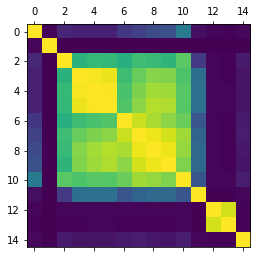

In [43]:
#Correlation table
plt.matshow(continuos_variable.corr())
plt.show()

<b>From Correlation table we find that</b><br>
Feature forecast_3_month,forecast_6_month,forecast_9_month are highly correlated<br>
perf_6_month_avg,perf_12_month_avg are highly correlated<br>
sales_1_month,sales_3_month,sales_6_month,sales_9_month are correlated<br>


<b>Colinearity</b> is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. In python this can by accomplished by using numpy's corrcoef function.<br>

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.<br>

A common R function used for testing regression assumptions and specifically multicolinearity is "VIF()" and unlike many statistical concepts, its formula is straightforward:<br>

V.I.F. = 1 / (1 - R^2)<br>

The <b>Variance Inflation Factor (VIF)</b> is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [44]:
#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuos_variable.values, i) for i in range(continuos_variable.shape[1])]
vif["features"] = continuos_variable.columns

In [45]:
vif 

,VIF Factor,features
0,1.845352,national_inv
1,2.114718,lead_time
2,2.866972,in_transit_qty
3,87.633362,forecast_3_month
4,492.922128,forecast_6_month
5,275.176237,forecast_9_month
6,7.096840,sales_1_month
7,55.142726,sales_3_month
8,101.114513,sales_6_month
9,22.944864,sales_9_month


In [46]:
#Removing perf_12_month_avg
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg'],axis=1)
vif_1 = pd.DataFrame()
vif_1["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_1["features"] = continuos_variable_1.columns

In [47]:
vif_1

,VIF Factor,features
0,1.845335,national_inv
1,2.103110,lead_time
2,2.866946,in_transit_qty
3,87.632253,forecast_3_month
4,492.917385,forecast_6_month
5,275.173623,forecast_9_month
6,7.096836,sales_1_month
7,55.142069,sales_3_month
8,101.112074,sales_6_month
9,22.944864,sales_9_month


In [48]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month'],axis=1)
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_2["features"] = continuos_variable_1.columns

In [49]:
vif_2

,VIF Factor,features
0,1.844470,national_inv
1,2.103109,lead_time
2,2.654278,in_transit_qty
3,27.299326,forecast_3_month
4,49.529381,forecast_9_month
5,7.091127,sales_1_month
6,55.065493,sales_3_month
7,99.944894,sales_6_month
8,22.944840,sales_9_month
9,7.015119,min_bank


In [50]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month'],axis=1)
vif_3 = pd.DataFrame()
vif_3["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_3["features"] = continuos_variable_1.columns

In [51]:
vif_3

,VIF Factor,features
0,1.725577,national_inv
1,2.103006,lead_time
2,2.583366,in_transit_qty
3,4.105479,forecast_3_month
4,7.010137,sales_1_month
5,49.340089,sales_3_month
6,75.348014,sales_6_month
7,22.942683,sales_9_month
8,6.920735,min_bank
9,1.180907,pieces_past_due


In [52]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month"],axis=1)
vif_4 = pd.DataFrame()
vif_4["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_4["features"] = continuos_variable_1.columns

In [53]:
vif_4

,VIF Factor,features
0,1.721171,national_inv
1,2.102998,lead_time
2,2.583047,in_transit_qty
3,4.102966,forecast_3_month
4,7.009569,sales_1_month
5,45.919017,sales_3_month
6,34.040760,sales_6_month
7,6.920099,min_bank
8,1.180892,pieces_past_due
9,2.105892,perf_6_month_avg


In [54]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month"],axis=1)
vif_5 = pd.DataFrame()
vif_5["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_5["features"] = continuos_variable_1.columns

In [55]:
vif_5

,VIF Factor,features
0,1.527560,national_inv
1,2.102986,lead_time
2,2.582870,in_transit_qty
3,2.818817,forecast_3_month
4,6.466516,sales_1_month
5,10.925490,sales_3_month
6,6.562656,min_bank
7,1.180610,pieces_past_due
8,2.105762,perf_6_month_avg
9,1.006627,local_bo_qty


In [56]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month'],axis=1)
vif_6 = pd.DataFrame()
vif_6["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_6["features"] = continuos_variable_1.columns

In [57]:
vif_6

,VIF Factor,features
0,1.525936,national_inv
1,2.102985,lead_time
2,2.582322,in_transit_qty
3,2.816367,forecast_3_month
4,4.738734,sales_3_month
5,6.556546,min_bank
6,1.174795,pieces_past_due
7,2.105754,perf_6_month_avg
8,1.006557,local_bo_qty


In [58]:
continuos_variable_1.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty
national_inv,1.000000,0.003327,0.098473,0.080034,0.191604,0.405298,0.030307,0.003901,0.012814
lead_time,0.003327,1.000000,-0.006929,-0.007927,-0.006739,-0.007075,-0.001563,-0.006952,-0.001578
in_transit_qty,0.098473,-0.006929,1.000000,0.638241,0.687824,0.742187,0.161349,0.004295,0.063223
forecast_3_month,0.080034,-0.007927,0.638241,1.000000,0.764681,0.719626,0.359632,0.006065,0.043872
sales_3_month,0.191604,-0.006739,0.687824,0.764681,1.000000,0.854285,0.314536,0.006882,0.068080
min_bank,0.405298,-0.007075,0.742187,0.719626,0.854285,1.000000,0.262834,0.010274,0.071582
pieces_past_due,0.030307,-0.001563,0.161349,0.359632,0.314536,0.262834,1.000000,-0.004457,0.009388
perf_6_month_avg,0.003901,-0.006952,0.004295,0.006065,0.006882,0.010274,-0.004457,1.000000,0.002165
local_bo_qty,0.012814,-0.001578,0.063223,0.043872,0.068080,0.071582,0.009388,0.002165,1.000000


## Redundant continuous feature
'perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month'

<b>Data After dim_reduction

In [59]:
redundant_continuous_feature=['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month']

In [60]:
merged_data=merged_data.drop(redundant_continuous_feature,axis=1)

In [61]:
merged_data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,ppap_risk,stop_auto_buy,went_on_backorder,anymissing
0,0.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.0,0,0,1,0,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.0,1,0,1,0,1
3,7.0,8.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,2.0,0,0.0,0.85,0.0,1,0,1,0,1


In [62]:
merged_data.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
sales_3_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
local_bo_qty         float64
deck_risk              int64
ppap_risk              int64
stop_auto_buy          int64
went_on_backorder      int64
anymissing             int32
dtype: object

<b>Reducing Memory usage

In [63]:
#reducing memory
merged_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929935 entries, 0 to 242074
Columns: 15 entries, national_inv to anymissing
dtypes: float64(9), int32(1), int64(5)
memory usage: 228.2 MB


In [64]:
for col in ['national_inv','lead_time','in_transit_qty',
            'forecast_3_month','sales_3_month','min_bank','potential_issue',
            'pieces_past_due','perf_6_month_avg','local_bo_qty','deck_risk',
            'ppap_risk','stop_auto_buy','went_on_backorder','anymissing']:
    merged_data[col]=merged_data[col].astype(np.int32)

In [65]:
merged_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929935 entries, 0 to 242074
Columns: 15 entries, national_inv to anymissing
dtypes: int32(15)
memory usage: 125.2 MB


# Sampling the data to remove imbalance class distribution

##   Imbalanced Learning Methods

- Imbalanced classification is a supervised learning problem where one class outnumbers other class by a large proportion. This problem is faced more frequently in binary classification problems than multi-level classification problems. The reasons which leads to reduction in **accuracy** of ML algorithms on imbalanced data sets:

    1. ML algorithms struggle with accuracy because of the unequal distribution in dependent variable.
    2. This causes the performance of existing classifiers to get biased towards majority class.
    3. The algorithms are accuracy driven i.e. they aim to minimize the overall error to which the minority class contributes very little.
    4. ML algorithms assume that the data set has balanced class distributions.
    5. They also assume that errors obtained from different classes have same cost

In [66]:
#Splitting the data into training as well as testing set
X, y = merged_data.drop(['went_on_backorder'],axis=1), merged_data.went_on_backorder
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(merged_data.shape)
print(len(X_train)+len(X_test))

(1447451, 14)
(482484, 14)
(1447451,)
(482484,)
(1929935, 15)
1929935


<b>Checking the accuracy if we predict all the products are not on bacorder that is class 0

In [68]:
from sklearn.dummy import DummyClassifier
# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
dummy_majority.score(X_test, y_test)

0.99268991303338561

We get the accuracy very high but it is unable to predict the product which is on backorder(Class 1).

# Model selection using evaluation metrics

 ## _K_-Fold Cross Validation
In  _K_-fold cross-validation (CV), we randomly split the training dataset into  _K_
  folds without replacement, where  _K−1_
  folds are used for the model training and the remaining 1 fold is for testing. This procedure is repeated  _K_
  times so that we obtain  _K_
  models and  _K_ performance estimates. Then we take their **average** as the final performance estimate.


###  Hierarchy of sampling-based methods.
1. Under-sampling

 Under-sampling methods reduces the number of samples from the majority class in order to balance between majority and minority classes. However, the main drawback of under-sampling is that it may miss some important infomations.
    
2. Oversampling

 On the opposite of **Under-sampling**, Oversampling methods add the samples to original imbalanced data set.
    - <b>Pros:</b> Leads to no information loss. 
    - <b>Cons:</b> Oversampling simply adds replicated observations in original data set, it ends up adding multiple observations of several types, thus leading to overfitting. Although, the training accuracy of such data set will be high, but the accuracy on unseen data will be worse.



<h3>Average Sampling simply implement by scikit-learn</h3>
Scikit-Learn provide [**StratifiedShuffleSplit**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) API by preserving the percentage of samples for each class.

-This cross-validation object is a merge of **StratifiedKFold** and **ShuffleSplit**, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.<br>
-Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.<br><b>Example:</b><br>we have a dataset with 80 class 0 records and 20 class 1 records. We may gain a mean response value of (80(0)+20(1))/100 = 0.2 and we want 0.2 to be the mean response value of all folds. This is also a quick way in EDA to measure if the dataset given is imbalanced instead of counting.

# Sampling with smote and average sampling

In [69]:
#data_splitting
from sklearn.model_selection import train_test_split
X, y = merged_data.drop(['went_on_backorder'],axis=1), merged_data.went_on_backorder
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99,test_size=0.3)
from sklearn.model_selection import train_test_split
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1350954, 14) (1350954,)
(578981, 14) (578981,)


In [71]:
print(np.sum(y_train)/len(y_train))
print(np.sum(y_test)/len(y_test))

0.00725857431119
0.00721094474603


In [133]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [134]:
X = merged_data.drop('went_on_backorder', axis=1).values
y = merged_data['went_on_backorder'].values
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)

10

In [135]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [136]:
print(len(X_train),len(X_test),len(y_train),len(y_test))
print(X_train.shape,X_test.shape,len(y_train),len(y_test))

1350954 578981 1350954 578981
(1350954, 14) (578981, 14) 1350954 578981


In [137]:
#Percentage of class: 1 in y_train and y_test respectively
np.sum(y_train)/len(y_train)

0.0072445101757720844

In [138]:
np.sum(y_test)/len(y_test)

0.007243761021518841

# Modeling

# Random Forest

### ROC curves, Area-Under-Curve (AUC)

MaxDepth = 2.00  accuracy = 0.99   AUC = 0.8790
MaxDepth = 4.00  accuracy = 0.99   AUC = 0.8960
MaxDepth = 6.00  accuracy = 0.99   AUC = 0.9106
MaxDepth = 8.00  accuracy = 0.99   AUC = 0.9225
MaxDepth = 10.00  accuracy = 0.99   AUC = 0.9292
MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9416
MaxDepth = 20.00  accuracy = 0.99   AUC = 0.9341


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


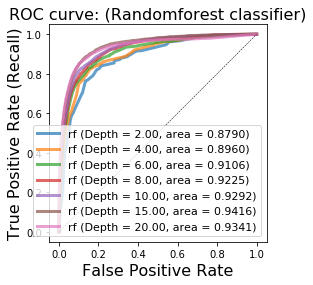

In [139]:
for g in [2, 4, 6,8,10,15,20]:
    rf = RandomForestClassifier(max_depth=g,random_state=0).fit(X_train, y_train)
    y_score_rf = rf.predict_proba(X_test)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(X_test, y_test)
    print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

min_samples_split = 200.0000  accuracy = 0.9928   AUC = 0.9406
min_samples_split = 300.0000  accuracy = 0.9928   AUC = 0.9376
min_samples_split = 400.0000  accuracy = 0.9928   AUC = 0.9392
min_samples_split = 500.0000  accuracy = 0.9928   AUC = 0.9390
min_samples_split = 600.0000  accuracy = 0.9928   AUC = 0.9379
min_samples_split = 800.0000  accuracy = 0.9928   AUC = 0.9382
min_samples_split = 1000.0000  accuracy = 0.9928   AUC = 0.9369
min_samples_split = 1500.0000  accuracy = 0.9928   AUC = 0.9363


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


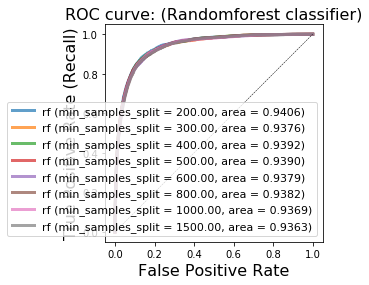

In [140]:
for g in [200,300,400,500,600,800,1000,1500]:
    rf = RandomForestClassifier(max_depth=15,random_state=0,min_samples_split=g).fit(X_train, y_train)
    y_score_rf = rf.predict_proba(X_test)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(X_test, y_test)
    print("min_samples_split = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (min_samples_split = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [142]:
%%time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
rf = RandomForestClassifier(max_depth=15,random_state=0,min_samples_split = 200).fit(X_train, y_train)
y_score_rf = rf.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
accuracy_rf = rf.score(X_test, y_test)
print(accuracy_rf)
print(roc_auc_rf)

0.992756238978
0.940627953244
Wall time: 1min 48s


MaxDepth = 15.0000 min_samples_split = 200.0000 accuracy = 0.99   AUC = 0.9406


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


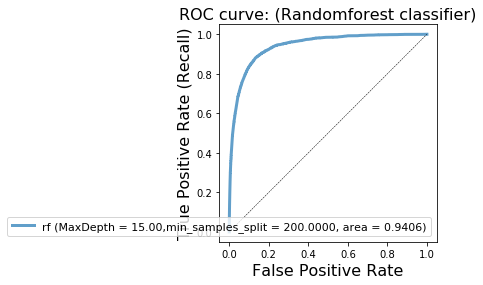

In [144]:
print("MaxDepth = {:.4f} min_samples_split = {:.4f} accuracy = {:.2f}   AUC = {:.4f}".format(15,200, accuracy_rf, roc_auc_rf))
plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, label='rf (MaxDepth = {:0.2f},min_samples_split = {:.4f}, area = {:0.4f})'.format(15,200,roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision-recall score: 0.20


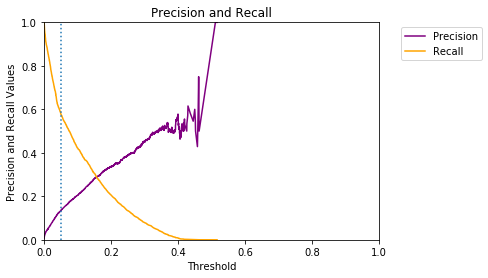

In [145]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_rf[:,1])
average_precision = average_precision_score(y_test, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [146]:
y_prob_test=pd.DataFrame(y_score_rf[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          559169  15618   574787
1            1766   2428     4194
__all__    560935  18046   578981


In [147]:
#Recall
2428/4194

0.5789222699093943

In [148]:
#Precision
2428/18046

0.1345450515349662

# CART(Classification and Regression Tree)

In [145]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### Merged Data

MaxDepth = 200.0000  accuracy = 0.9927   AUC = 0.8826
MaxDepth = 250.0000  accuracy = 0.9927   AUC = 0.8926
MaxDepth = 300.0000  accuracy = 0.9927   AUC = 0.8977
MaxDepth = 400.0000  accuracy = 0.9928   AUC = 0.9076
MaxDepth = 500.0000  accuracy = 0.9928   AUC = 0.9121
MaxDepth = 600.0000  accuracy = 0.9927   AUC = 0.9188
MaxDepth = 700.0000  accuracy = 0.9927   AUC = 0.9206
MaxDepth = 800.0000  accuracy = 0.9927   AUC = 0.9222
MaxDepth = 900.0000  accuracy = 0.9927   AUC = 0.9234
MaxDepth = 1000.0000  accuracy = 0.9927   AUC = 0.9247
MaxDepth = 1200.0000  accuracy = 0.9927   AUC = 0.9268
MaxDepth = 1500.0000  accuracy = 0.9927   AUC = 0.9272


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


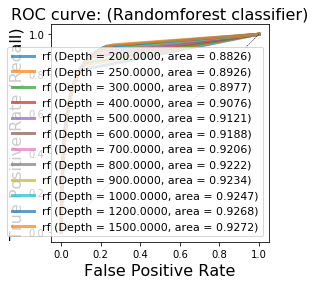

In [154]:
for g in [200,250,300,400,500,600,700,800,900,1000,1200,1500]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=g, random_state=99).fit(X_train, y_train)
    y_score_dt = dt.predict_proba(X_test)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test, y_test)
    print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [161]:
#optimised tree training
dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=700, random_state=99).fit(X_train, y_train)
y_score_dt = dt.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
accuracy_dt = dt.score(X_test, y_test)
print(accuracy_dt)
print(roc_auc_dt)
print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(700, accuracy_dt, roc_auc_dt))

0.99273551291
0.920566351589
MaxDepth = 700.0000  accuracy = 0.9927   AUC = 0.9206


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


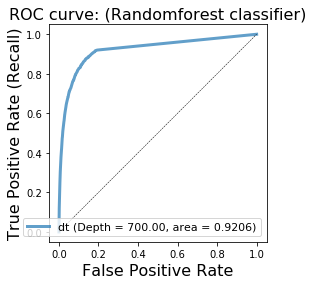

In [162]:
plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, label='dt (Depth = {:0.2f}, area = {:0.4f})'.format(700, roc_auc_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision-recall score: 0.18


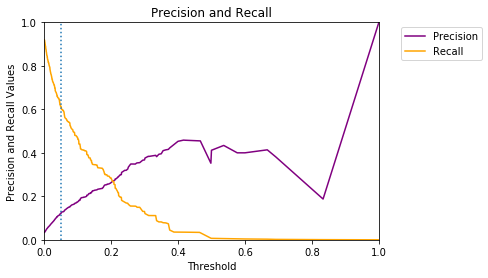

In [163]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_dt[:,1])
average_precision = average_precision_score(y_test, y_score_dt[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [164]:
y_prob_test=pd.DataFrame(y_score_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          556059  18728   574787
1            1618   2576     4194
__all__    557677  21304   578981


In [166]:
print('precision:',(2576/21304))
print('recall',(2576/4194))

precision: 0.1209162598573038
recall 0.614210777300906


# Adaboosted decision tree

<b>Tuned Adaboost

In [171]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

MaxDepth = 10.0000  accuracy = 0.9928   AUC = 0.8942
MaxDepth = 20.0000  accuracy = 0.9927   AUC = 0.9029
MaxDepth = 30.0000  accuracy = 0.9927   AUC = 0.9043
MaxDepth = 40.0000  accuracy = 0.9926   AUC = 0.9057
MaxDepth = 50.0000  accuracy = 0.9925   AUC = 0.9061
MaxDepth = 60.0000  accuracy = 0.9926   AUC = 0.9063
MaxDepth = 70.0000  accuracy = 0.9925   AUC = 0.9064
MaxDepth = 80.0000  accuracy = 0.9926   AUC = 0.9066
MaxDepth = 100.0000  accuracy = 0.9925   AUC = 0.9069
MaxDepth = 150.0000  accuracy = 0.9925   AUC = 0.9069
MaxDepth = 200.0000  accuracy = 0.9925   AUC = 0.9070
MaxDepth = 250.0000  accuracy = 0.9925   AUC = 0.9071
MaxDepth = 300.0000  accuracy = 0.9926   AUC = 0.9071
MaxDepth = 400.0000  accuracy = 0.9926   AUC = 0.9072
MaxDepth = 500.0000  accuracy = 0.9926   AUC = 0.9073
MaxDepth = 600.0000  accuracy = 0.9926   AUC = 0.9074


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


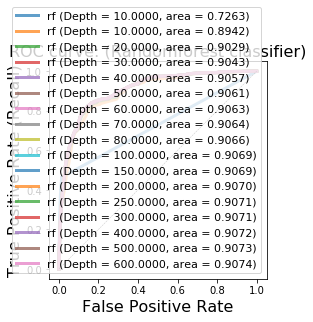

In [173]:
for g in [10,20,30,40,50,60,70,80,100,150,200,250,300,400,500,600]:
    ada_dt=AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini",min_samples_split=700, random_state=99,max_depth=1),algorithm="SAMME",n_estimators=g).fit(X_train, y_train)
    y_score_ada_dt = ada_dt.predict_proba(X_test)
    fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test, y_score_ada_dt[:,1])
    roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
    accuracy_ada_dt = ada_dt.score(X_test, y_test)
    print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
    plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost_design_tree classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

MaxDepth = 200.0000  accuracy = 0.9925   AUC = 0.9070


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


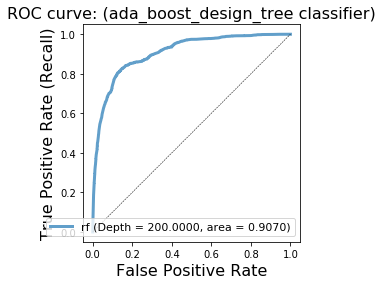

Wall time: 25min 12s


In [178]:
%%time
#optimised adaboosted tree training
ada_dt=AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini",min_samples_split=700, random_state=99,max_depth=1),algorithm="SAMME",n_estimators=200).fit(X_train, y_train)
y_score_ada_dt = ada_dt.predict_proba(X_test)
fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test, y_score_ada_dt[:,1])
roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
accuracy_ada_dt = ada_dt.score(X_test, y_test)

MaxDepth = 200.0000  accuracy = 0.9925   AUC = 0.9070


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


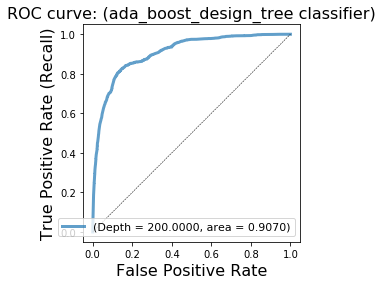

In [179]:
print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(200, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='(Depth = {:0.4f}, area = {:0.4f})'.format(200, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost_decision_tree classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.1358 


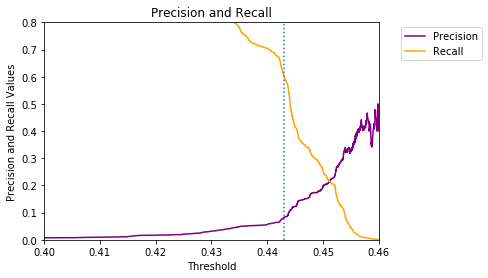

In [205]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_ada_dt[:,1])
average_precision = average_precision_score(y_test, y_score_ada_dt[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.443,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0.4,0.46])
plt.ylim([0,0.8])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [183]:
y_score_ada_dt[:,1]

array([ 0.42697322,  0.40815834,  0.41487211, ...,  0.45367938,
        0.44227576,  0.41025363])

In [202]:
y_prob_test=pd.DataFrame(y_score_ada_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.443 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          546685  28102   574787
1            1673   2521     4194
__all__    548358  30623   578981


In [204]:
print('recall',2521/4194)

recall 0.6010968049594659


In [203]:
print('precision',2521/30623)

precision 0.08232374359141821


<h1>Optimised Logistic Regression</h1>

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


MaxDepth = 0.0100  accuracy = 0.6196   AUC = 0.9044
MaxDepth = 0.0010  accuracy = 0.4872   AUC = 0.8951
MaxDepth = 0.0500  accuracy = 0.7185   AUC = 0.9008
MaxDepth = 0.1000  accuracy = 0.7966   AUC = 0.8919
MaxDepth = 0.5000  accuracy = 0.9137   AUC = 0.8822
MaxDepth = 1.0000  accuracy = 0.9609   AUC = 0.8117


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


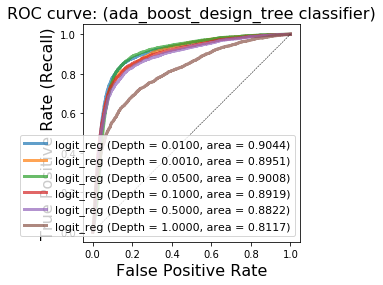

Wall time: 1h 51min 32s


In [177]:
%%time
for c in [0.01,0.001,0.05,0.1,0.5,1]:#iterating using maxdepth
    logit_reg = LogisticRegression(penalty = 'l2', C = c,class_weight="balanced",dual=True).fit(X_train, y_train)
    y_score_logit_reg = logit_reg.predict_proba(X_test)
    fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
    roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
    accuracy_logit_reg = logit_reg.score(X_test, y_test)
    print("C = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(c, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
    plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(c,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost_design_tree classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
%%time
#optimised adaboosted tree training
logit_reg = LogisticRegression(penalty = 'l2', C = 0.05,class_weight="balanced",dual=True).fit(X_train, y_train)
y_score_logit_reg = logit_reg.predict_proba(X_test)
fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
accuracy_logit_reg = logit_reg.score(X_test, y_test)

In [ ]:
print("C= {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.05, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(0.05,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (optimised_log_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# Adaboost classifiers

# Nural Network

# GBM